In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [34]:
# Gerando os dados.
x = np.linspace(0, 1, 1000)
a, b, c = 0, 10, -10
np.random.seed(2360873)
y = a + b * x + c * x ** 2 + np.random.normal(0, 0.1, len(x))
df = pd.DataFrame({'x': x, 'y': y})

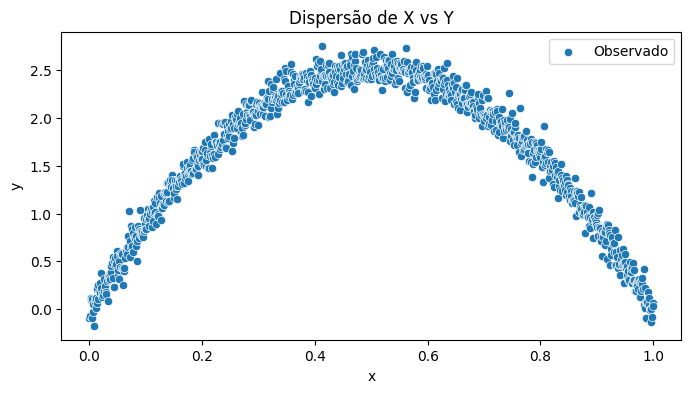

In [35]:
# Primeiro gráfico de X por Y.
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='y', data=df)
plt.title("Dispersão de X vs Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Observado"])
plt.show()

In [36]:
# Boosting: Construindo a primeira árvore.
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(df[['x']], df['y'])
df['p'] = tree.predict(df[['x']])
df['r'] = df['y'] - df['p']
df.head()

,x,y,p,r
0,0.000000,-0.095988,0.754507,-0.850495
1,0.001001,-0.071637,0.754507,-0.826144
2,0.002002,0.092474,0.754507,-0.662033
3,0.003003,0.122510,0.754507,-0.631997
4,0.004004,0.107867,0.754507,-0.646640


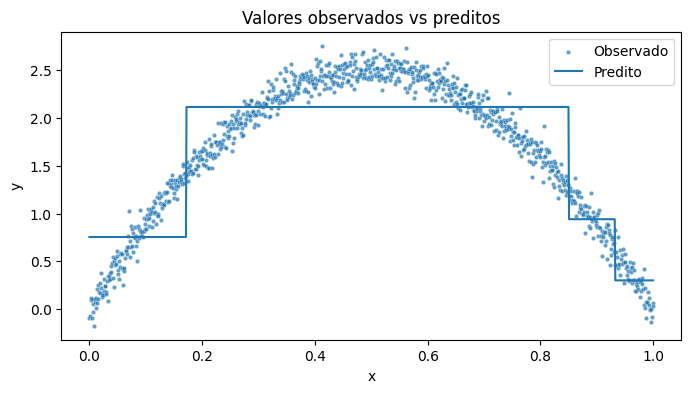

In [37]:
# Visualização gráfica dos valores esperados e observados.
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='y', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='p', data=df, label='Predito')
plt.title("Valores observados vs preditos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

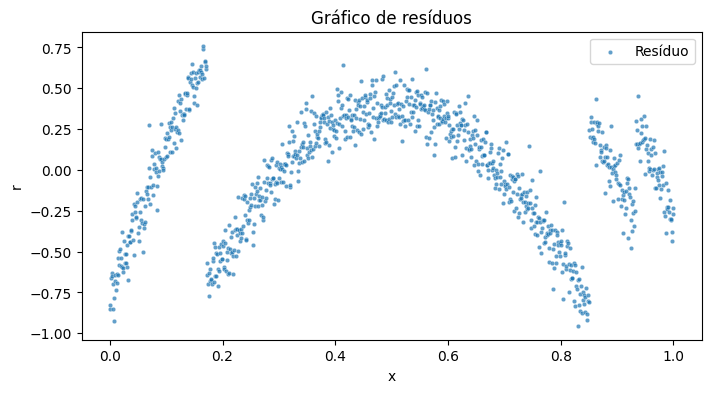

In [38]:
# Gráfico de resíduos.
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='r', data=df, alpha=0.7, label='Resíduo', s=10)
plt.title("Gráfico de resíduos")
plt.xlabel("x")
plt.ylabel("r")
plt.legend()
plt.show()

In [39]:
# Primeira iteração do boosting (uma árvore nos resíduos do anterior).
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(df[['x']], df['r'])
df['p1'] = tree1.predict(df[['x']])
df['P1'] = df['p'] + df['p1']
df['r1'] = df['r'] - df['p1']
df.head()

,x,y,p,r,p1,P1,r1
0,0.000000,-0.095988,0.754507,-0.850495,-0.131114,0.623394,-0.719381
1,0.001001,-0.071637,0.754507,-0.826144,-0.131114,0.623394,-0.695030
2,0.002002,0.092474,0.754507,-0.662033,-0.131114,0.623394,-0.530920
3,0.003003,0.122510,0.754507,-0.631997,-0.131114,0.623394,-0.500884
4,0.004004,0.107867,0.754507,-0.646640,-0.131114,0.623394,-0.515526


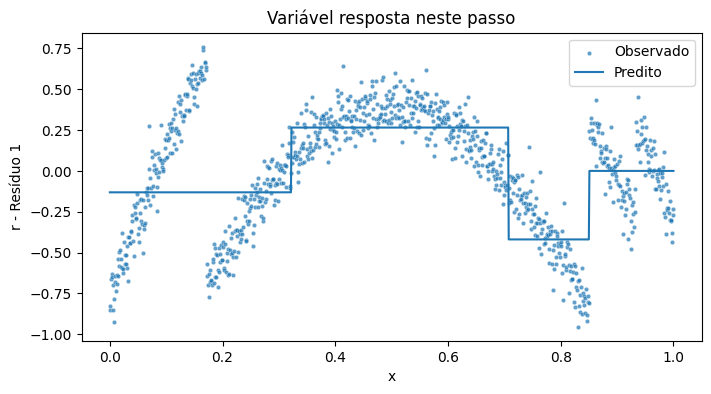

In [40]:
# Gráfico.
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='r', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='p1', data=df, label='Predito')
plt.title("Variável resposta neste passo")
plt.xlabel("x")
plt.ylabel("r - Resíduo 1")
plt.legend()
plt.show()


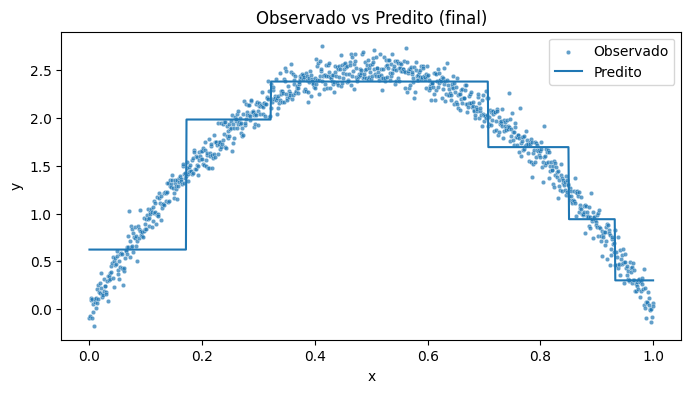

In [41]:
# Observado vs Esperado (final).
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='y', data=df, alpha=0.7, label='Observado', s=10)
sns.lineplot(x='x', y='P1', data=df, label='Predito')
plt.title("Observado vs Predito (final)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

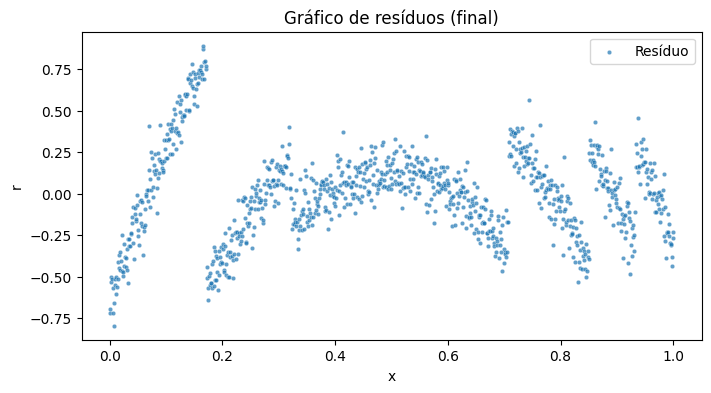

In [42]:
# Gráfico de resíduos (final).
plt.figure(figsize=(8, 4))
sns.scatterplot(x='x', y='r1', data=df, alpha=0.7, label='Resíduo', s=10)
plt.title("Gráfico de resíduos (final)")
plt.xlabel("x")
plt.ylabel("r")
plt.legend()
plt.show()

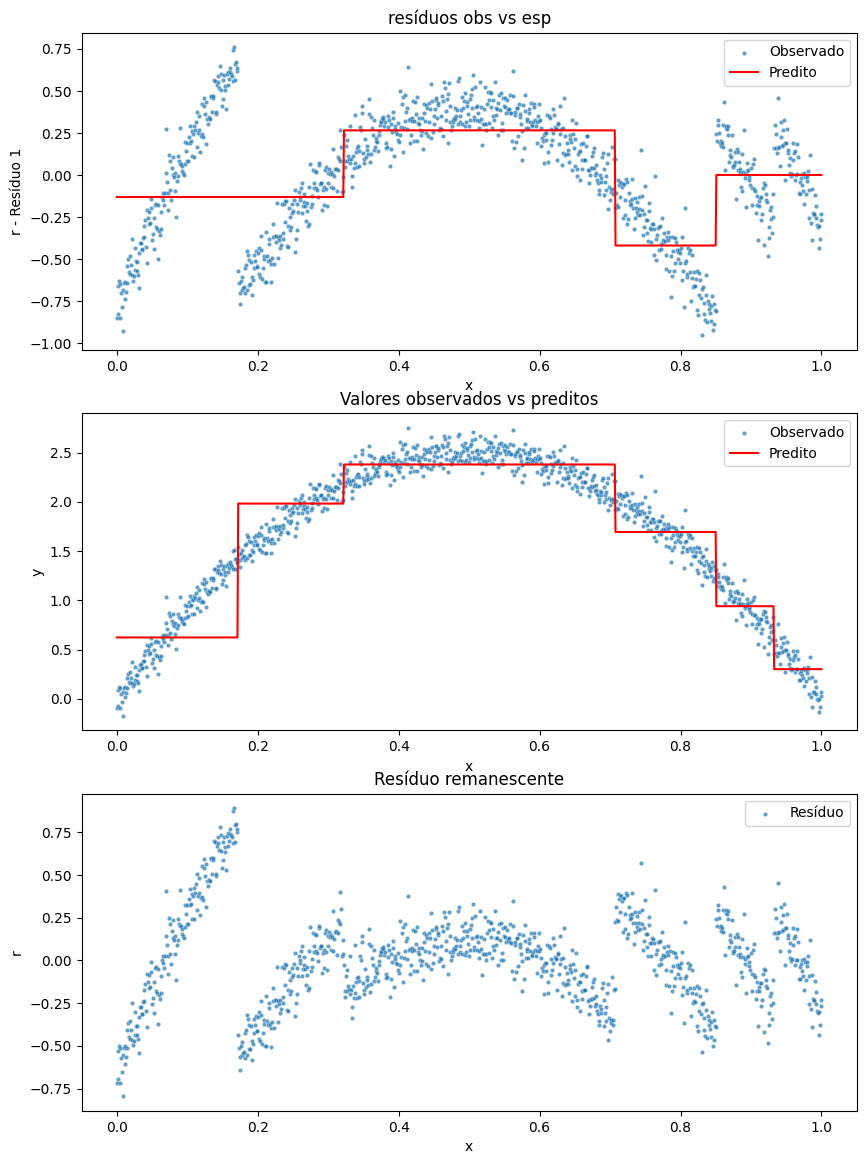

In [43]:
# Empacotando os gráficos em uma função.
def graficos(df=df, y="y", x="x", r="r", p="p1", P='P1', ri='r1'):
    fig, ax = plt.subplots(3,1, figsize=(10, 14))
    
    # Mostrando somente a iteração atual: resíduos observados vs esperados.
    sns.scatterplot(x=x, y=r, data=df, alpha=0.7, label='Observado', s=10, ax=ax[0])
    sns.lineplot(x=x, y=p, data=df, label='Predito', ax=ax[0], color="red")
    ax[0].set_title("resíduos obs vs esp")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("r - Resíduo 1")
    ax[0].legend()

    
    # Visualização gráfica dos valores esperados e observados (dados originais).
    sns.scatterplot(x=x, y=y, data=df, alpha=0.7, label='Observado', s=10, ax=ax[1])
    sns.lineplot(x=x, y=P, data=df, label='Predito', ax=ax[1], color="red")
    ax[1].set_title("Valores observados vs preditos")
    ax[1].set_xlabel(x)
    ax[1].set_ylabel(y)
    ax[1].legend()

    # Gráfico de resíduos.
    sns.scatterplot(x=x, y=ri, data=df, alpha=0.7, label='Resíduo', s=10, ax=ax[2])
    ax[2].set_title("Resíduo remanescente")
    ax[2].set_xlabel(x)
    ax[2].set_ylabel(r)
    ax[2].legend()
    plt.show()

graficos(df=df, y="y", x="x", r="r", p="p1", P='P1')

In [44]:
# Segunda iteração do boosting.
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(df[['x']], df['r1'])
df['p2'] = tree2.predict(df[['x']])
df['P2'] = df['P1'] + df['p2']
df['r2'] = df['r1'] - df['p2']
df.head()

,x,y,p,r,p1,P1,r1,p2,P2,r2
0,0.000000,-0.095988,0.754507,-0.850495,-0.131114,0.623394,-0.719381,-0.602729,0.020664,-0.116652
1,0.001001,-0.071637,0.754507,-0.826144,-0.131114,0.623394,-0.695030,-0.602729,0.020664,-0.092301
2,0.002002,0.092474,0.754507,-0.662033,-0.131114,0.623394,-0.530920,-0.602729,0.020664,0.071810
3,0.003003,0.122510,0.754507,-0.631997,-0.131114,0.623394,-0.500884,-0.602729,0.020664,0.101846
4,0.004004,0.107867,0.754507,-0.646640,-0.131114,0.623394,-0.515526,-0.602729,0.020664,0.087203


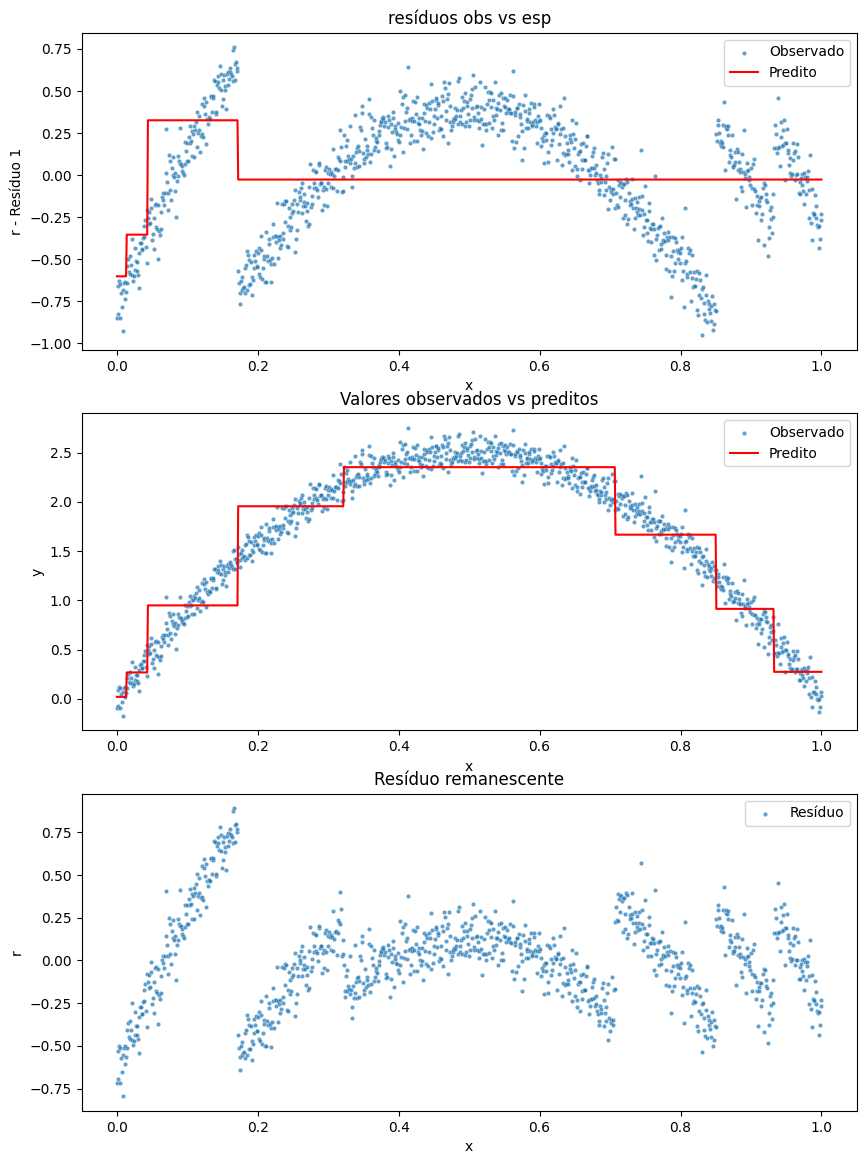

In [45]:
# Gráficos.
graficos(df=df, y="y", x="x", r="r", p="p2", P='P2')

In [46]:
# Terceira iteração do boosting.
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(df[['x']], df['r2'])
df['p3'] = tree2.predict(df[['x']])
df['P3'] = df['P2'] + df['p3']
df['r3'] = df['r2'] - df['p3']
df.head()

,x,y,p,r,p1,P1,r1,p2,P2,r2,p3,P3,r3
0,0.000000,-0.095988,0.754507,-0.850495,-0.131114,0.623394,-0.719381,-0.602729,0.020664,-0.116652,4.711993e-17,0.020664,-0.116652
1,0.001001,-0.071637,0.754507,-0.826144,-0.131114,0.623394,-0.695030,-0.602729,0.020664,-0.092301,4.711993e-17,0.020664,-0.092301
2,0.002002,0.092474,0.754507,-0.662033,-0.131114,0.623394,-0.530920,-0.602729,0.020664,0.071810,4.711993e-17,0.020664,0.071810
3,0.003003,0.122510,0.754507,-0.631997,-0.131114,0.623394,-0.500884,-0.602729,0.020664,0.101846,4.711993e-17,0.020664,0.101846
4,0.004004,0.107867,0.754507,-0.646640,-0.131114,0.623394,-0.515526,-0.602729,0.020664,0.087203,4.711993e-17,0.020664,0.087203


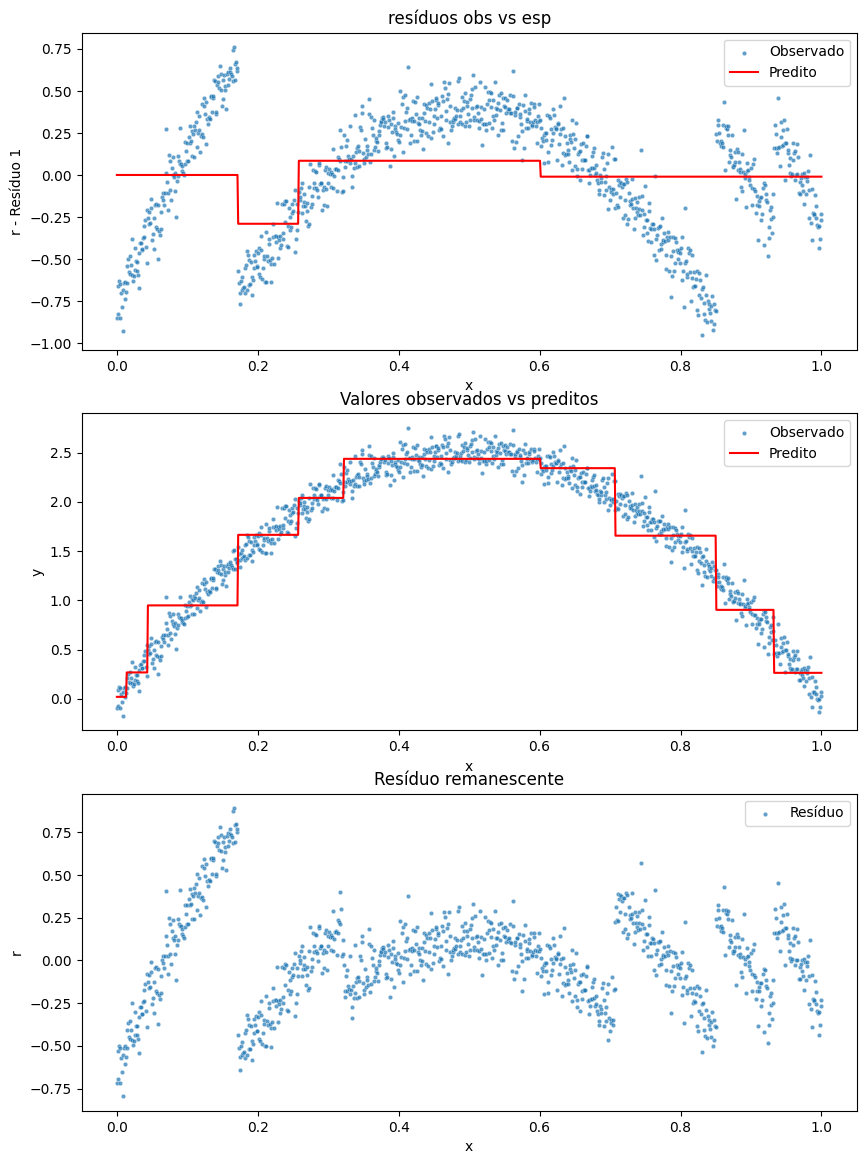

In [47]:
#Gráfico.
graficos(df=df, y="y", x="x", r="r", p="p3", P='P3')